# Loan predictions

## Goal

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

This is a very pivotal step in the process of analyzing data. This involves understanding the problem and making some hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analysis which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Think further and create some of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Perform some basic data exploration here and come up with some inferences about the data. Try to figure out some irregularities and address them in the next section. 

In [40]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv("classification_exercise.csv") 
df.head()
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

One of the key challenges in any data set is missing values. Lets start by checking which columns contain missing values.

In [41]:
print(df.shape)
pd.DataFrame(df.dtypes).sort_index()

(614, 13)


,0
ApplicantIncome,int64
CoapplicantIncome,float64
Credit_History,float64
Dependents,object
Education,object
Gender,object
LoanAmount,float64
Loan_Amount_Term,float64
Loan_ID,object
Loan_Status,object


In [42]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


In [43]:
#df[df.columns] = df_transformed[df.columns].apply(pd.to_numeric, errors='coerce')
#df = df.fillna(df.median())
#df.Credit_History.unique()
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].value_counts().index[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].value_counts().index[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].value_counts().index[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Gender'] = df['Gender'].fillna(df['Gender'].value_counts().index[0])
df['Married'] = df['Married'].fillna(df['Married'].value_counts().index[0])

In [44]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [45]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Loan_Status,0,0.0
Property_Area,0,0.0
Credit_History,0,0.0
Loan_Amount_Term,0,0.0
LoanAmount,0,0.0
CoapplicantIncome,0,0.0
ApplicantIncome,0,0.0
Self_Employed,0,0.0
Education,0,0.0
Dependents,0,0.0


Look at some basic statistics for numerical variables.

In [46]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


1. How many applicants have a `Credit_History`. (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with expectation? And `CoapplicantIncome`?
3. Tipp: Possible skew in the data can be seen by comparing the mean to the median, i.e. the 50% figure of a feature.



In [47]:
h = df
h.Credit_History.value_counts()
#h['Credit_History'] = h['year']//10 * 10
#h
#h.groupby('decade')['decade'].value_counts()#.sort_values()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

Moving to nominal (categorical) variable. Look at the number of unique values in each of them.

In [48]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [49]:
print(df.Loan_ID.nunique(),
df.Gender.nunique(),
df.Married.nunique(),
df.Dependents.nunique(),
df.Education.nunique(),
df.Self_Employed.nunique(),
df.Property_Area.nunique(),
df.Loan_Status.nunique())

614 2 2 4 2 2 3 2


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reason

In [50]:
df.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [51]:
df.Married.value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [52]:
df.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [53]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [54]:
df.Self_Employed.value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [55]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [56]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



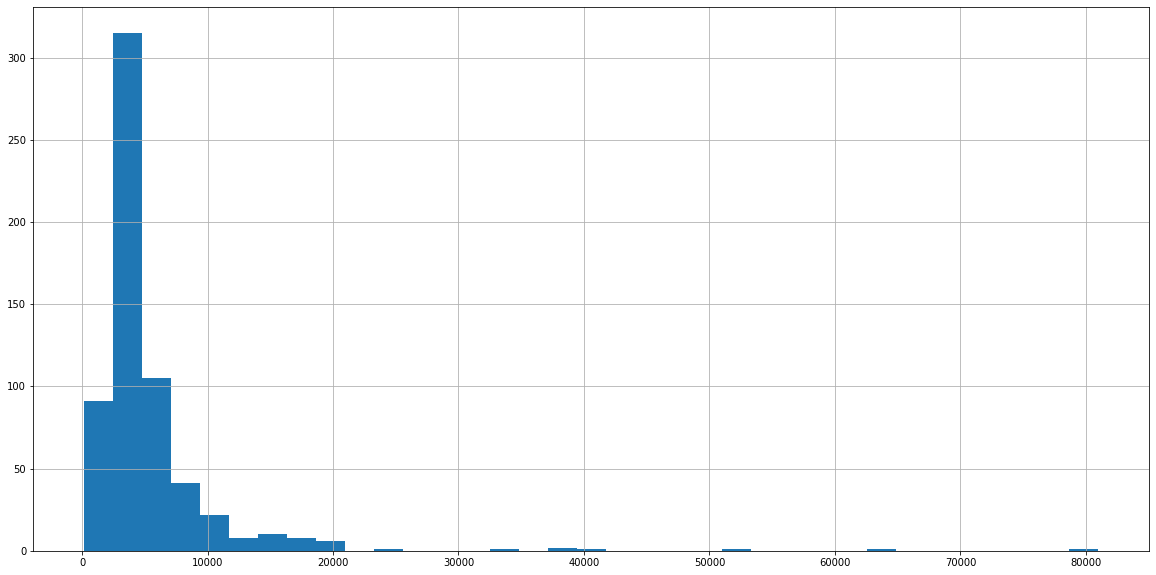

In [57]:
y = df.ApplicantIncome
y.hist(bins=35, figsize=(20,10))
#plt.figure(figsize=(20,10))


Look at box plots to understand the distributions. 

(array([0, 1]), <a list of 2 Text xticklabel objects>)

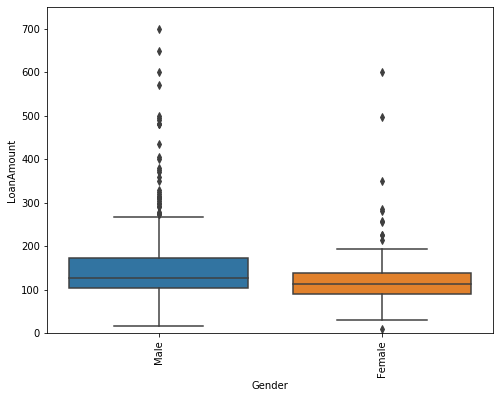

In [58]:
var = 'Gender'
data = df[['LoanAmount',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="LoanAmount", data=df)
fig.axis(ymin=0, ymax=750)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

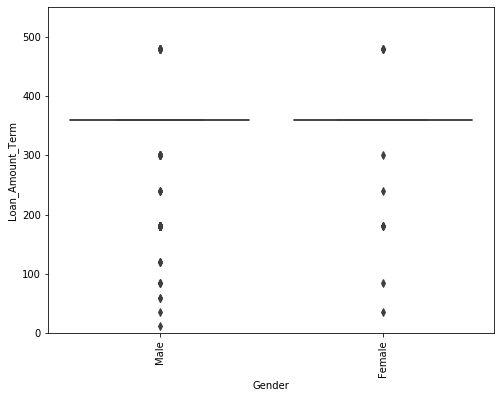

In [59]:
ar = 'Gender'
data = df[['Loan_Amount_Term',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Loan_Amount_Term", data=df)
fig.axis(ymin=0, ymax=550)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

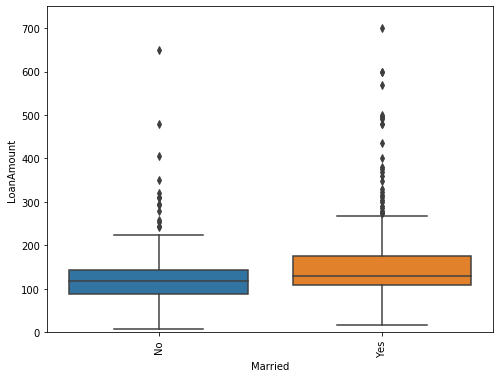

In [60]:
var = 'Married'
data = df[['LoanAmount',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="LoanAmount", data=df)
fig.axis(ymin=0, ymax=750)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

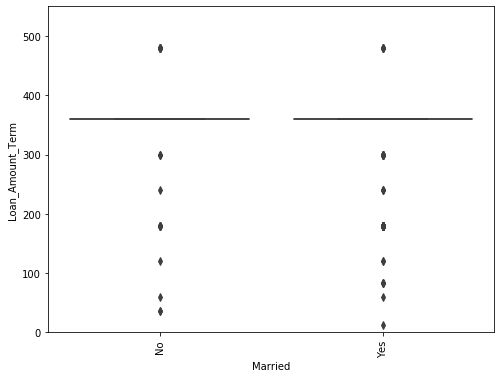

In [61]:
ar = 'Married'
data = df[['Loan_Amount_Term',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Loan_Amount_Term", data=df)
fig.axis(ymin=0, ymax=550)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

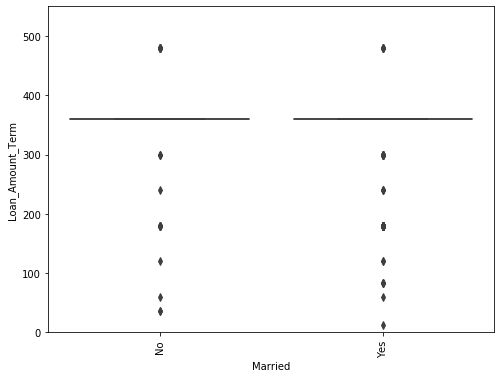

In [62]:
ar = 'Dependents'
data = df[['Loan_Amount_Term',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Loan_Amount_Term", data=df)
fig.axis(ymin=0, ymax=550)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

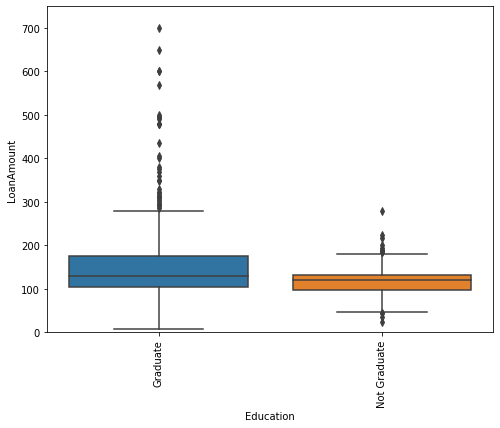

In [63]:
var = 'Education'
data = df[['LoanAmount',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="LoanAmount", data=df)
fig.axis(ymin=0, ymax=750)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

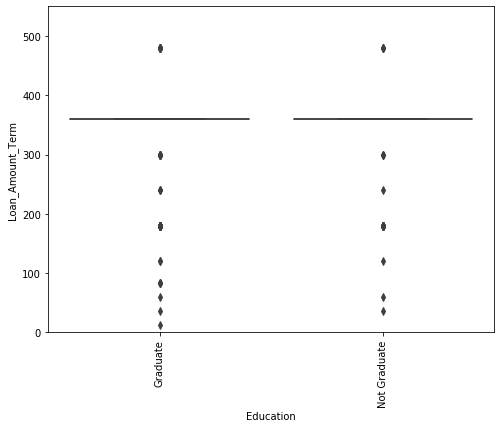

In [64]:
ar = 'Education'
data = df[['Loan_Amount_Term',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Loan_Amount_Term", data=df)
fig.axis(ymin=0, ymax=550)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

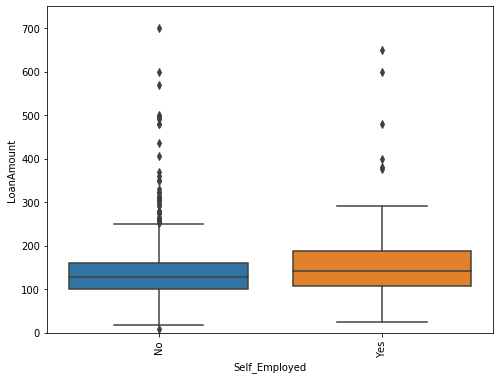

In [65]:
var = 'Self_Employed'
data = df[['LoanAmount',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="LoanAmount", data=df)
fig.axis(ymin=0, ymax=750)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

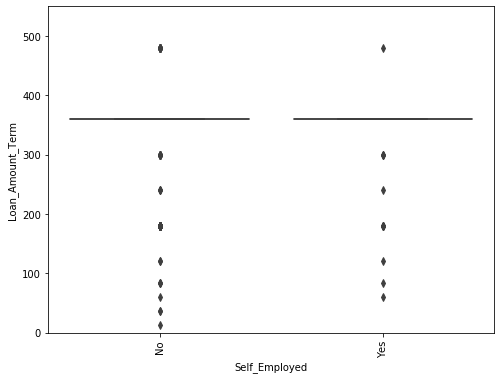

In [66]:
ar = 'Self_Employed'
data = df[['Loan_Amount_Term',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Loan_Amount_Term", data=df)
fig.axis(ymin=0, ymax=550)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

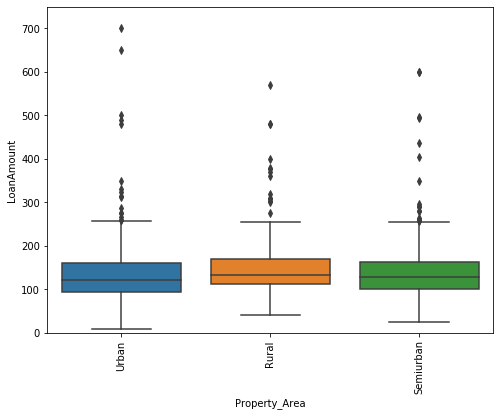

In [67]:
var = 'Property_Area'
data = df[['LoanAmount',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="LoanAmount", data=df)
fig.axis(ymin=0, ymax=750)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

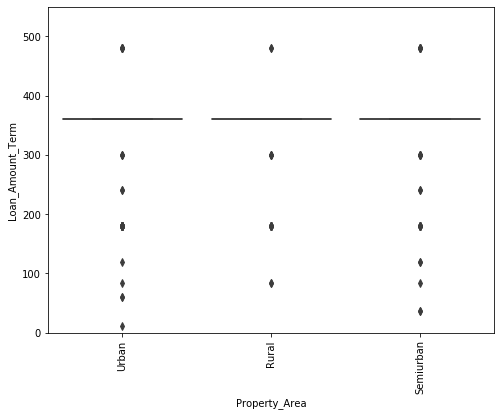

In [68]:
ar = 'Property_Area'
data = df[['Loan_Amount_Term',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Loan_Amount_Term", data=df)
fig.axis(ymin=0, ymax=550)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

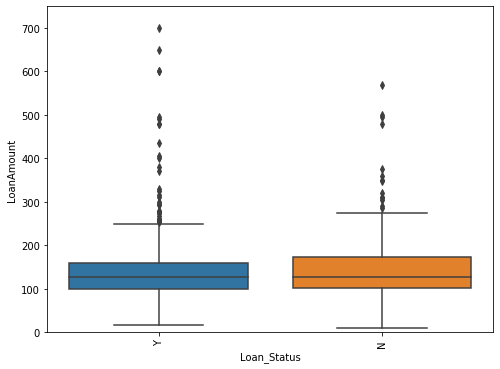

In [69]:
var = 'Loan_Status'
data = df[['LoanAmount',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="LoanAmount", data=df)
fig.axis(ymin=0, ymax=750)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

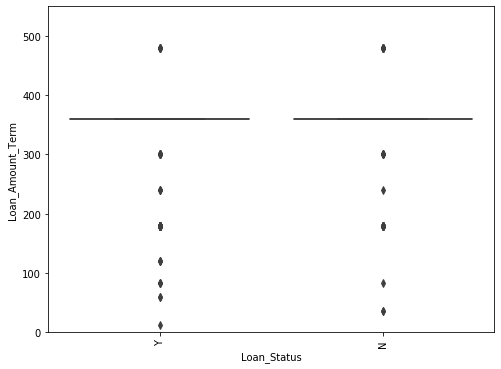

In [70]:
ar = 'Loan_Status'
data = df[['Loan_Amount_Term',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Loan_Amount_Term", data=df)
fig.axis(ymin=0, ymax=550)
plt.xticks(rotation=90)

Look at the distribution of income segregated  by `Education`

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

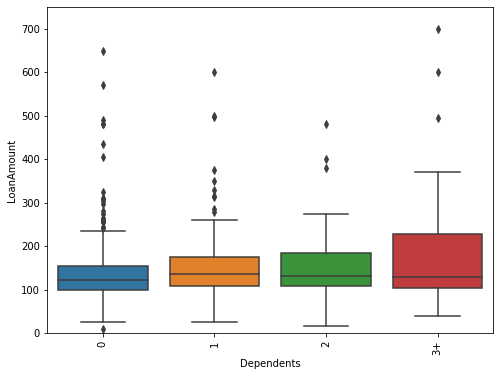

In [71]:
var = 'Dependents'
data = df[['LoanAmount',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="LoanAmount", data=df)
fig.axis(ymin=0, ymax=750)
plt.xticks(rotation=90)

Look at the histogram and boxplot of LoanAmount

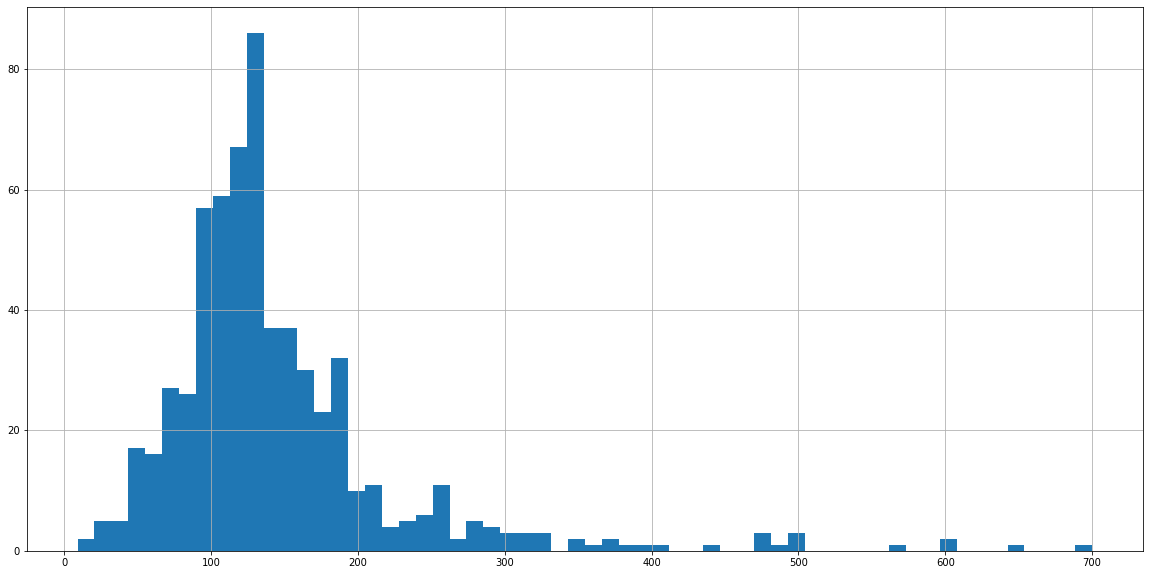

In [72]:
y = df.LoanAmount
y.hist(bins=60, figsize=(20,10))
#plt.figure(figsize=(20,10))

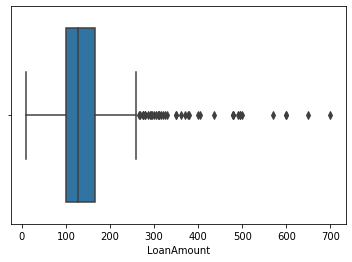

In [73]:
sns.boxplot( x=df["LoanAmount"]);
plt.show()

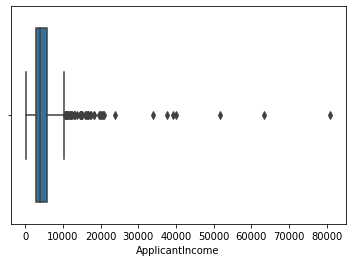

In [74]:
sns.boxplot( x=df["ApplicantIncome"]);
plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pivot_table`. 

In [75]:
table = pd.pivot_table(df, values='Loan_Status', index=[ "Credit_History"],
                    columns=['Gender'], aggfunc=lambda x: len(x))
table

Gender,Female,Male
Credit_History,,
0.0,17,72
1.0,95,430


In [76]:
table = pd.pivot_table(df, values='LoanAmount', index=[ "Credit_History"],
                    columns=['Self_Employed'], aggfunc=np.sum)
table

Self_Employed,No,Yes
Credit_History,,
0.0,10921.0,2062.0
1.0,64599.0,11910.0


The chances of getting a loan are much higher if the applicant has a valid credit history. Plot similar graphs by `Married`, `Self-Employed`, `Property_Area`, etc.

## 3. Variable Transformation

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [77]:
df["LoanAmount"] = df["LoanAmount"].replace({0.0:3812.5})
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### Outliers
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after transformation

In [78]:
#y = pd.to_numeric(df.LoanAmount)
y = df.LoanAmount
y
#y1 = math.log10(y)
for i in range(0,len(y)-1):
    print(math.log10(i))
    

ValueError: math domain error

In [ ]:
#y.hist(bins=60, figsize=(20,10))
#plt.figure(figsize=(20,10))
#y = np.log(df.LoanAmount,10)
#y.hist(bins=60, figsize=(20,10))
#plt.figure(figsize=(20,10))

Combine both incomes as total income and take a log transformation of the same.

### Categorical Variables
Create dummy variables from categorical ones. If the variable is ordinal, we can simply map it to numbers.

In [ ]:
df.dtypes
df.head(20)
#df.tail()

In [ ]:
#df["gender_numeric"] = np.where(df.Gender == "Female",'X', df.c3) lambda x: x*10 if x<2 else (x**2 if x<4 else x+10)
df["gender_numeric"] = df['Gender'].apply(lambda x: 1 if x == 'Female' else 0)
df["married_numeric"] = df['Married'].apply(lambda x: 1 if x == 'Yes' else 0)
df["education_numeric"] = df['Education'].apply(lambda x: 1 if x == 'Graduate' else 0)
df["self_employed_numeric"] = df['Self_Employed'].apply(lambda x: 1 if x == 'Yes' else 0)
df["loan_status_numeric"] = df['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)
df["dependents_numeric"] = df['Dependents'].apply(lambda x: 0 if x=='0' else (1 if x=='1' else (2 if x=='2' else 3)))
df["property_area_numeric"] = df['Property_Area'].apply(lambda x: 0 if x=='Urban' else (1 if x=='Semiurban' else 2))


## Building a Predictive Model

Make the first `LogisticRegression` model with `Credit_History` as the only feature.

In [ ]:
feature_cols = ['Credit_History']
X = df[feature_cols] # Features
y = df.Loan_Status # Target variable

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label='Y'))
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label='Y'))

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Try different combination of variables

In [ ]:
feature_cols = ['Credit_History', 'self_employed_numeric', 'education_numeric', 'gender_numeric', 'married_numeric', 'dependents_numeric', 'ApplicantIncome']
X = df[feature_cols] # Features
y = df.Loan_Status # Target variable

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label='Y'))
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label='Y'))

The accuracy might went up on adding variables, what about other metrics?

Try `RandomForestClassifier` with default parameters

In [ ]:
feature_cols = ['Credit_History', 'LoanAmount', 'ApplicantIncome'] #, 'ApplicantIncome'
X = df[feature_cols] # Features
y = df.Loan_Status # Target variable

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label='Y'))
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label='Y'))

Try `grid search` to improve the results